<a href="https://colab.research.google.com/github/prasunamishra/AI.FinalClassRegs/blob/main/2551531_PrasunaMishraRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REGRESSION TASK**

#California Housing Price Prediction
(Aligns with: UN SDG 11 – Sustainable Cities & Communities)

#1. IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from mlxtend.feature_selection import SequentialFeatureSelector as SFS



# 2. LOAD DATASET

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/california_regression.csv")

In [ ]:
# First 5 rows
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
# Last 5 rows
df.tail()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24
2226381,108243.0,sold,580000.0,5.0,3.0,0.31,307704.0,Richland,Washington,99354.0,3615.0,2022-03-23


In [ ]:
#Number of rows and columns
print("Dataset Shape:", df.shape)

Dataset Shape: (2226382, 12)


# 3. DATA CLEANING & PREPROCESSING

In [ ]:
# Removing rows where target variable (price) is missing
df = df.dropna(subset=["price"])

In [ ]:
# Filling missing acre_lot values with median
df["acre_lot"].fillna(df["acre_lot"].median(), inplace=True)

/tmp/ipython-input-2339112466.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["acre_lot"].fillna(df["acre_lot"].median(), inplace=True)


In [ ]:
df=df.dropna()

In [ ]:
# Dropping irrelevant columns
df = df.drop(columns=["prev_sold_date", "brokered_by"], errors="ignore")

In [ ]:
# Removing rows missing key numerical features
df = df.dropna(subset=["house_size", "bed", "bath"])

In [ ]:
# Remove duplicates
df = df.drop_duplicates()

In [ ]:
print("Cleaned Shape:", df.shape)

Cleaned Shape: (1243880, 10)


# 4. EXPLORATORY DATA ANALYSIS (EDA)

Histograms

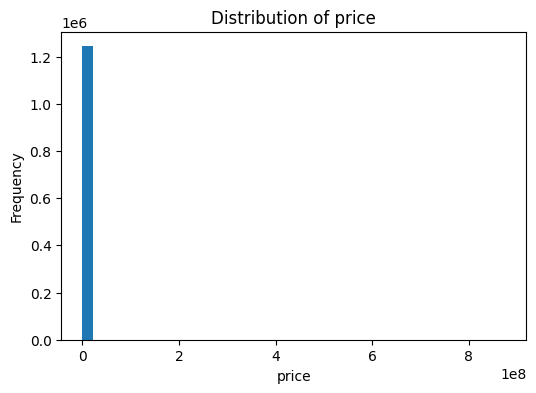

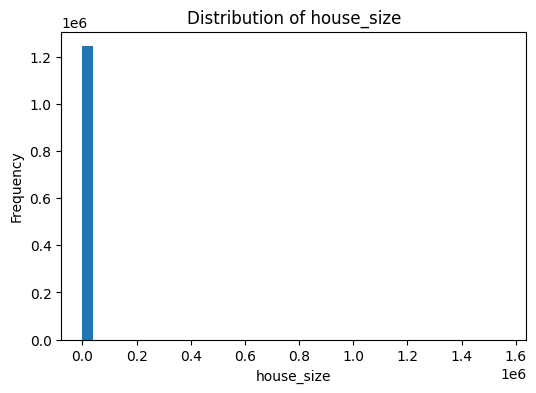

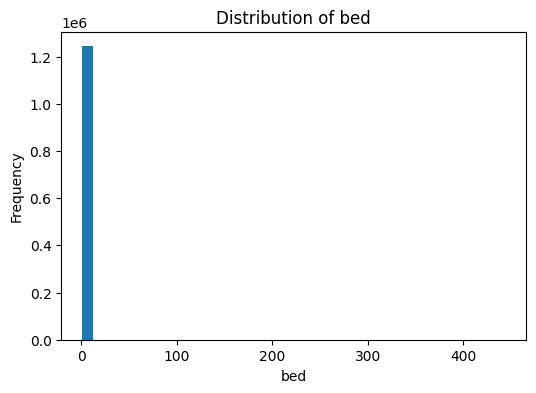

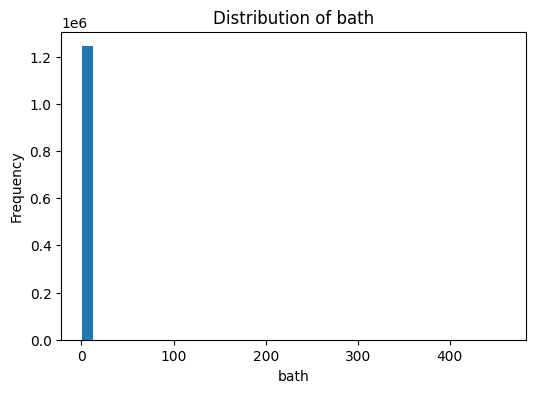

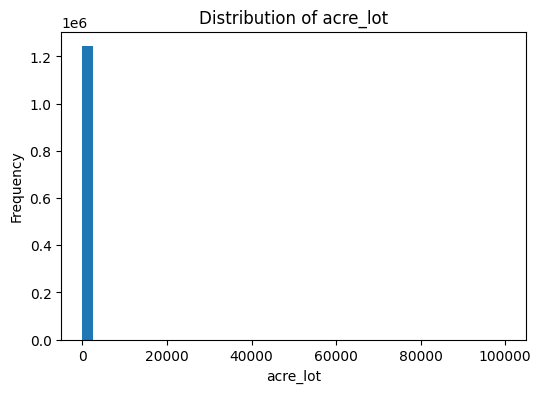

In [ ]:
numeric_cols = ["price", "house_size", "bed", "bath", "acre_lot"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=40)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


Boxplots (Outlier detection)

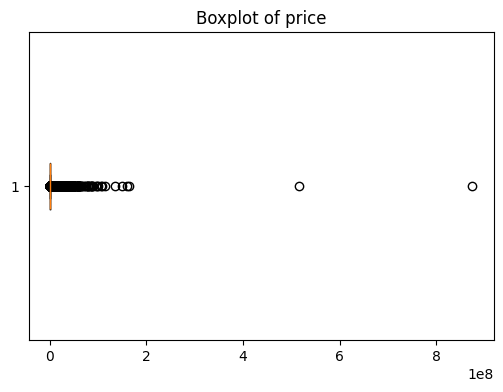

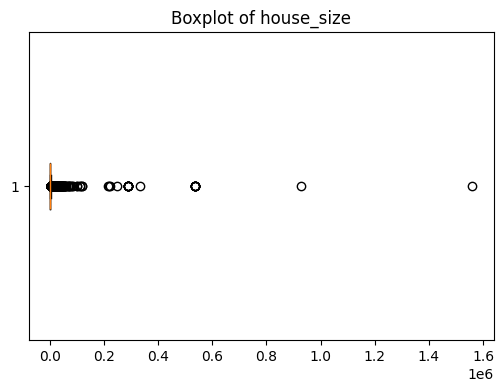

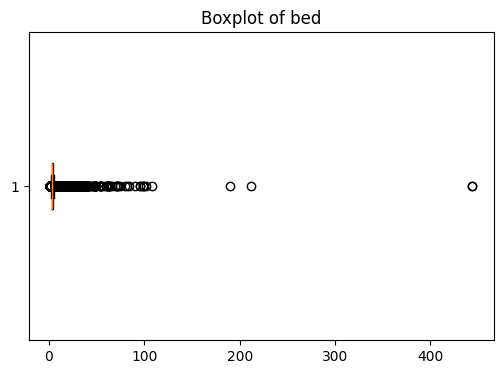

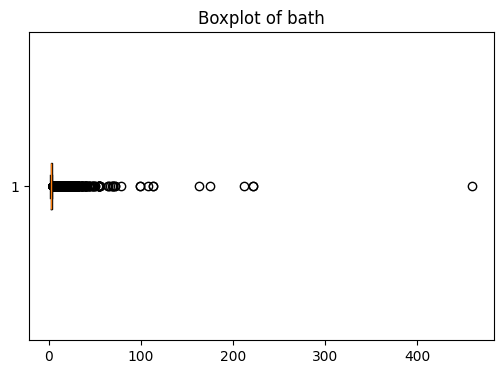

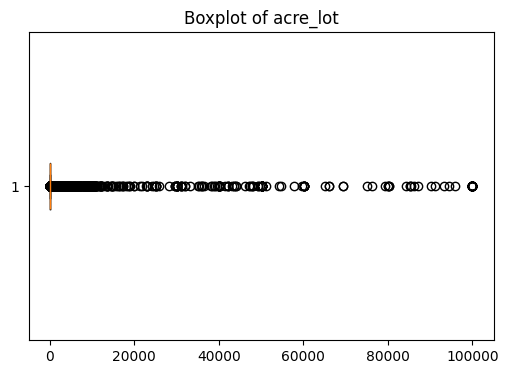

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.show()


Correlation Heatmap

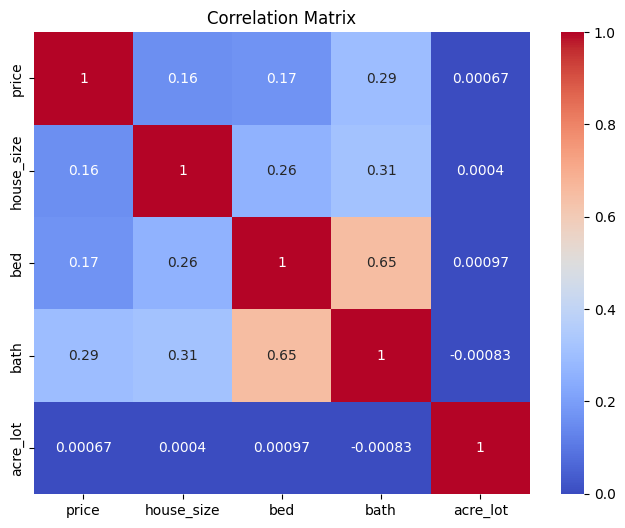

In [ ]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Scatter plots vs target

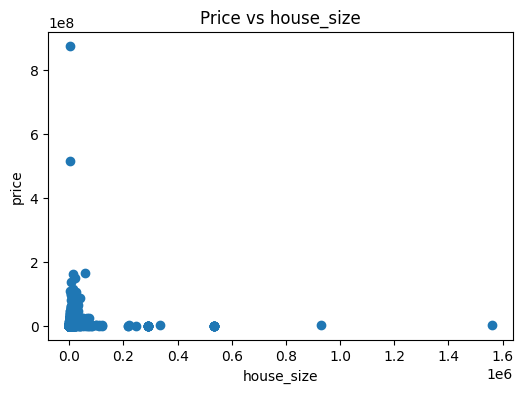

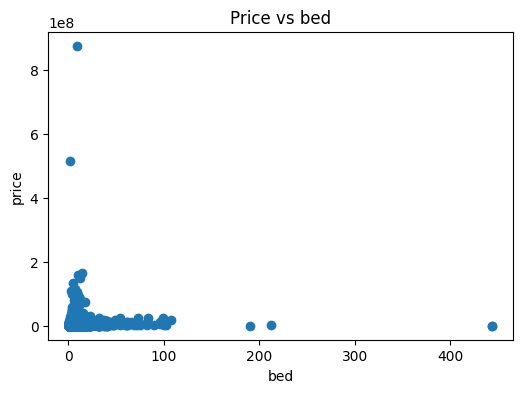

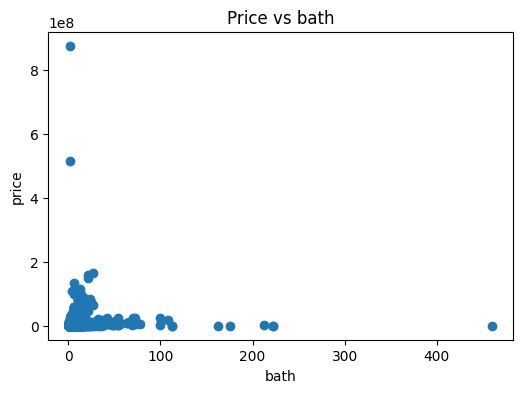

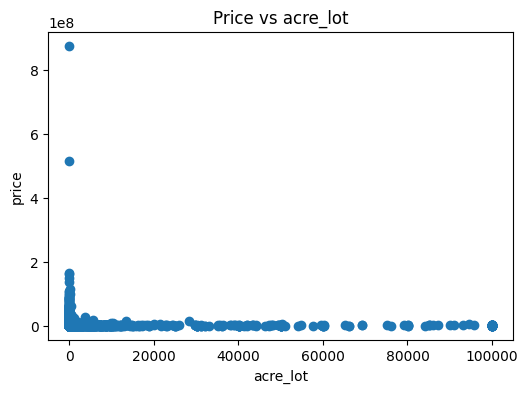

In [ ]:
features = ["house_size", "bed", "bath", "acre_lot"]

for col in features:
    plt.figure(figsize=(6,4))
    plt.scatter(df[col], df["price"])
    plt.xlabel(col)
    plt.ylabel("price")
    plt.title(f"Price vs {col}")
    plt.show()


Price by status

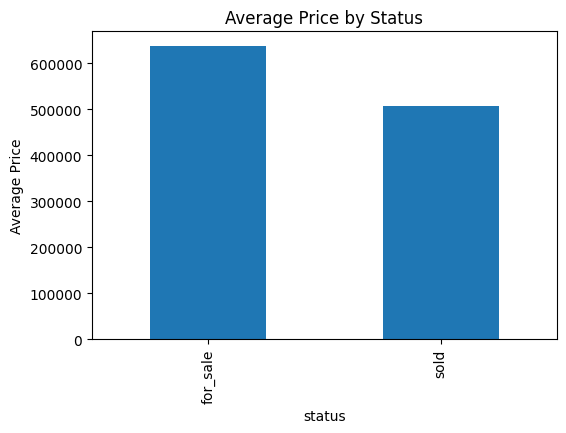

In [ ]:
status_avg = df.groupby("status")["price"].mean()

status_avg.plot(kind="bar", figsize=(6,4))
plt.title("Average Price by Status")
plt.ylabel("Average Price")
plt.show()


Price by state

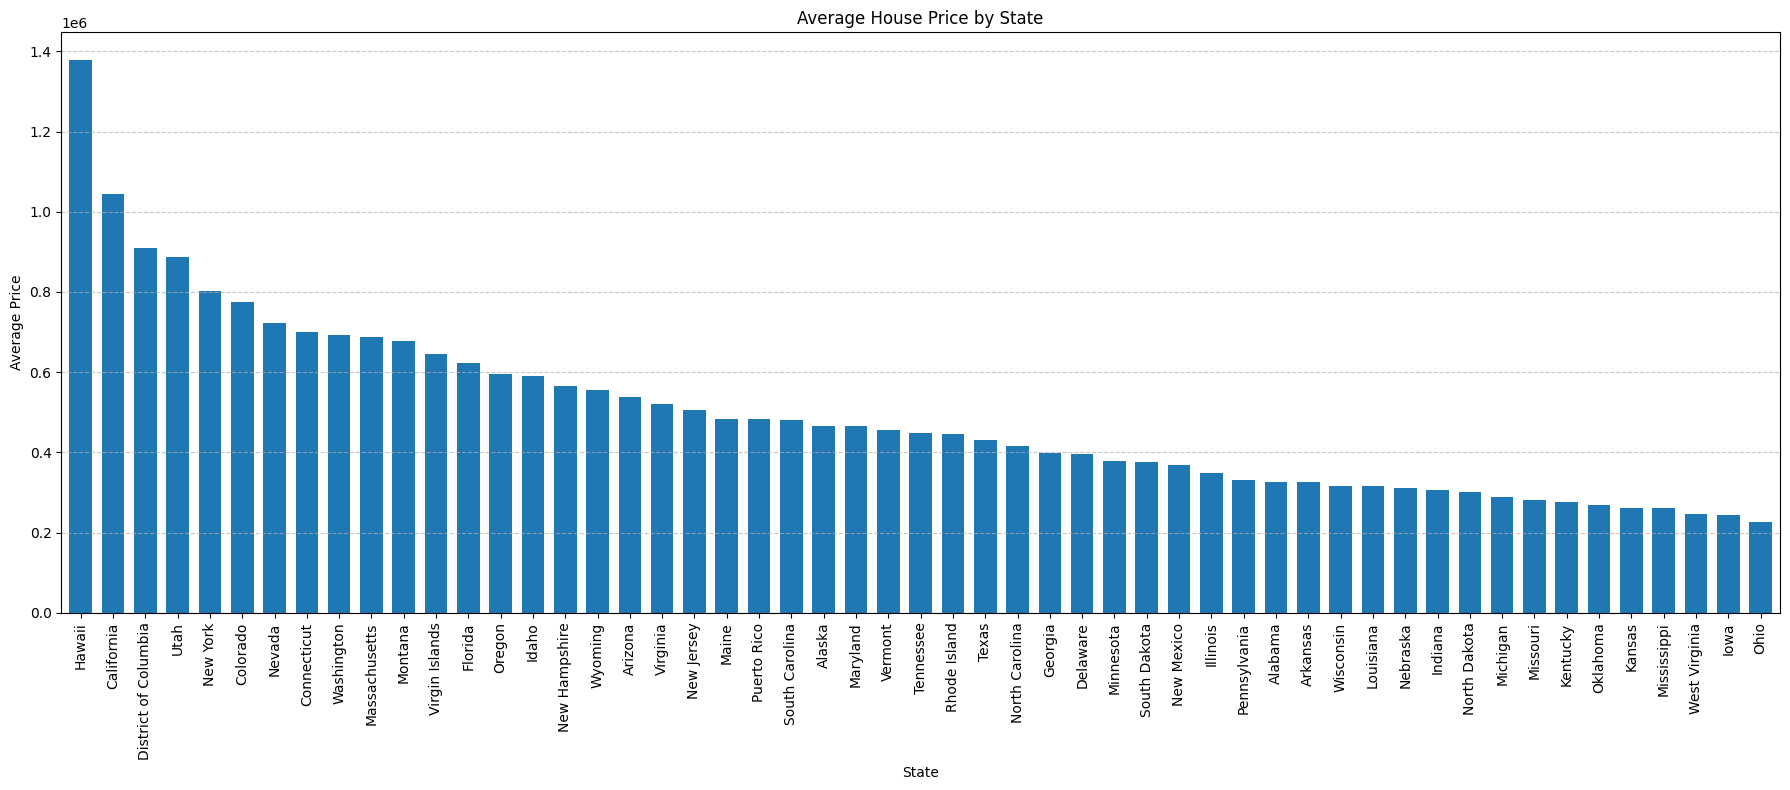

In [ ]:
state_avg = (
    df.groupby("state")["price"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(18, 8))  # wider figure for many states
state_avg.plot(kind="bar", width=0.7)

plt.title("Average House Price by State")
plt.ylabel("Average Price")
plt.xlabel("State")
plt.xticks(rotation=90)  # vertical labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. TRAIN–TEST SPLIT

In [ ]:
df["status"] = df["status"].str.lower().map({"sold": 1, "for_sale": 0})

In [ ]:
df = df.drop(columns=["street"], errors="ignore")

In [ ]:
# Frequency encoding for city
city_freq = df["city"].value_counts()
df["city"] = df["city"].map(city_freq)

In [ ]:
# Frequency encoding for state
state_freq = df["state"].value_counts()
df["state"] = df["state"].map(state_freq)

In [ ]:
y = df["price"]
X = df.drop(columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)


Train: (995104, 8)
Test : (248776, 8)


# 6. PREPROCESSING

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. NEURAL NETWORK REGRESSION MODEL

In [67]:
from sklearn.metrics import mean_squared_error, r2_score
# Neural Network (Multi-Layer Perceptron Regressor)
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=200,
    random_state=42
)


Train model

In [ ]:
mlp.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64, 32), random_state=42)

Predictions

In [ ]:
train_pred = mlp.predict(X_train_scaled)
test_pred  = mlp.predict(X_test_scaled)

Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_nn(name, y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)

    print(f"\n{name}")
    print("-"*30)
    print("MAE  :", round(mae, 2))
    print("MSE  :", round(mse, 2))
    print("RMSE :", round(rmse, 2))
    print("R²   :", round(r2, 4))


In [ ]:
evaluate_nn("MLP Regressor (Train)", y_train, train_pred)
evaluate_nn("MLP Regressor (Test)",  y_test,  test_pred)


MLP Regressor (Train)
------------------------------
MAE  : 239436.45
MSE  : 907131871299.7
RMSE : 952434.71
R²   : 0.3589

MLP Regressor (Test)
------------------------------
MAE  : 242918.3
MSE  : 3810689395764.88
RMSE : 1952098.72
R²   : 0.1203


A Multi-Layer Perceptron (MLP) Regressor was implemented to predict house prices.
#Architecture

Input layer: scaled housing features

Hidden Layer 1: 64 neurons (ReLU)

Hidden Layer 2: 32 neurons (ReLU)

Output layer: 1 neuron (Linear)

# 7. Building Primary Models

#Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [82]:
lr = LinearRegression()

Train on training set

In [83]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [84]:
# Predictions
train_pred_lr = lr.predict(X_train_scaled)
test_pred_lr  = lr.predict(X_test_scaled)

In [85]:
def evaluate_model(name, y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)

    print(f"\n{name}")
    print("-"*30)
    print("MAE  :", round(mae,2))
    print("MSE  :", round(mse,2))
    print("RMSE :", round(rmse,2))
    print("R²   :", round(r2,4))
    return mae,mse, rmse, r2


In [86]:



# Evaluate
lr_train_scores = evaluate_model(
    "Linear Regression (Train)",
    y_train,
    train_pred_lr
)

lr_test_scores = evaluate_model(
    "Linear Regression (Test)",
    y_test,
    test_pred_lr
)



Linear Regression (Train)
------------------------------
MAE  : 325180.16
MSE  : 1207360137151.21
RMSE : 1098799.41
R²   : 0.1467

Linear Regression (Test)
------------------------------
MAE  : 328164.54
MSE  : 4100406658440.11
RMSE : 2024946.09
R²   : 0.0534


# Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    random_state=42
)


Train Model

In [88]:
dt.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [89]:
#Prediction
train_pred_dt = dt.predict(X_train)
test_pred_dt  = dt.predict(X_test)


In [90]:
dt_train_scores = evaluate_model(
    "Decision Tree (Train)",
    y_train,
    train_pred_dt
)

dt_test_scores = evaluate_model(
    "Decision Tree (Test)",
    y_test,
    test_pred_dt
)


Decision Tree (Train)
------------------------------
MAE  : 1429.66
MSE  : 369665122.18
RMSE : 19226.68
R²   : 0.9997

Decision Tree (Test)
------------------------------
MAE  : 182714.1
MSE  : 5168475603944.45
RMSE : 2273428.16
R²   : -0.1932


In [91]:
# MODEL COMPARISON TABLE(Primary Model)

comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree"],
    "MAE":  [lr_test_scores[0], dt_test_scores[0]],
    "MSE":  [lr_test_scores[1], dt_test_scores[1]],
    "RMSE": [lr_test_scores[2], dt_test_scores[2]],
    "R2":   [lr_test_scores[3], dt_test_scores[3]]
})

print("\nPrimary Model Comparison (Before Tuning)")
comparison_df


Primary Model Comparison (Before Tuning)


,Model,MAE,MSE,RMSE,R2
0,Linear Regression,328164.544519,4.100407e+12,2.024946e+06,0.053397
1,Decision Tree,182714.099864,5.168476e+12,2.273428e+06,-0.193173


# Hyperparameter Optimization and CV

Linear(Ridge)

In [94]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

ridge_param_grid = {
    "alpha": [0.01, 0.1, 1.0, 10.0, 100.0],
    "fit_intercept": [True, False],
    "solver": ["auto", "svd", "cholesky", "lsqr"]
}

ridge_grid = GridSearchCV(
    estimator=ridge,
    param_grid=ridge_param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

# Ridge uses scaled data
ridge_grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr']},
             scoring='r2')

Results


In [95]:
print("\nBest Ridge Parameters:")
print(ridge_grid.best_params_)

print("\nBest Ridge CV Score:")
print(round(ridge_grid.best_score_,4))



Best Ridge Parameters:
{'alpha': 0.01, 'fit_intercept': True, 'solver': 'lsqr'}

Best Ridge CV Score:
0.1684


Decision Tree

In [96]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)

dt_param_grid = {
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["squared_error", "friedman_mse"]
}

dt_grid = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

# Decision tree uses normal (unscaled) data
dt_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

Results

In [46]:
print("\nBest Decision Tree Parameters:")
print(dt_grid.best_params_)

print("\nBest Decision Tree CV Score:")
print(round(dt_grid.best_score_,4))



Best Decision Tree Parameters:
{'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}

Best Decision Tree CV Score:
0.4056


Final Tuned Model

In [47]:
# Best tuned models
best_ridge = ridge_grid.best_estimator_
best_dt = dt_grid.best_estimator_


In [50]:
# Ridge predictions
train_pred_ridge = best_ridge.predict(X_train_scaled)
test_pred_ridge  = best_ridge.predict(X_test_scaled)

# Decision Tree predictions
train_pred_dt = best_dt.predict(X_train)
test_pred_dt  = best_dt.predict(X_test)


In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(name, y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)

    print(f"\n{name}")
    print("-"*40)
    print("MAE  :", round(mae,2))
    print("MSE  :", round(mse,2))
    print("RMSE :", round(rmse,2))
    print("R²   :", round(r2,4))

    return mae,mse, rmse, r2


In [99]:
ridge_scores = evaluate_model(
    "Final Tuned Ridge (Test)",
    y_test,
    test_pred_ridge
)

dt_scores = evaluate_model(
    "Final Tuned Decision Tree (Test)",
    y_test,
    test_pred_dt
)



Final Tuned Ridge (Test)
----------------------------------------
MAE  : 328178.17
MSE  : 4100413055252.35
RMSE : 2024947.67
R²   : 0.0534

Final Tuned Decision Tree (Test)
----------------------------------------
MAE  : 182714.1
MSE  : 5168475603944.45
RMSE : 2273428.16
R²   : -0.1932


In [100]:
optimized_comparison_df = pd.DataFrame({
    "Model": ["Ridge Regression (Optimized)", "Decision Tree (Optimized)"],
    "MAE":  [ridge_scores[0], dt_scores[0]],
    "MSE":  [ridge_scores[1], dt_scores[1]],
    "RMSE": [ridge_scores[2], dt_scores[2]],
    "R2":   [ridge_scores[3], dt_scores[3]]
})

print("\nOptimized Model Comparison (After Hyperparameter Tuning)")
optimized_comparison_df


Optimized Model Comparison (After Hyperparameter Tuning)


,Model,MAE,MSE,RMSE,R2
0,Ridge Regression (Optimized),328178.165629,4.100413e+12,2.024948e+06,0.053396
1,Decision Tree (Optimized),182714.099864,5.168476e+12,2.273428e+06,-0.193173


# Feature Selection

Feature selection Linear (Ridge regression)


In [54]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor


In [55]:
ridge_model = Ridge(**ridge_grid.best_params_)

sfs_ridge = SequentialFeatureSelector(
    ridge_model,
    n_features_to_select="auto",
    direction="forward",
    scoring="r2",
    cv=5,
    n_jobs=-1
)

sfs_ridge.fit(X_train_scaled, y_train)


SequentialFeatureSelector(estimator=Ridge(alpha=0.01, solver='lsqr'), n_jobs=-1,
                          scoring='r2')

In [56]:
ridge_selected_features = X.columns[sfs_ridge.get_support()]

print("\nSelected Features for Ridge Regression:")
print(list(ridge_selected_features))



Selected Features for Ridge Regression:
['status', 'bath', 'state', 'house_size']


Feature Selection for Decision Tree

In [57]:
dt_model = DecisionTreeRegressor(**dt_grid.best_params_)

sfs_dt = SequentialFeatureSelector(
    dt_model,
    n_features_to_select="auto",
    direction="forward",
    scoring="r2",
    cv=5,
    n_jobs=-1
)

sfs_dt.fit(X_train, y_train)


SequentialFeatureSelector(estimator=DecisionTreeRegressor(max_depth=10,
                                                          min_samples_leaf=4,
                                                          min_samples_split=10),
                          n_jobs=-1, scoring='r2')

In [58]:
dt_selected_features = X.columns[sfs_dt.get_support()]

print("\nSelected Features for Decision Tree:")
print(list(dt_selected_features))



Selected Features for Decision Tree:
['status', 'bath', 'zip_code', 'house_size']


Ridge prefers linear relationships

Decision Trees capture nonlinear interactions

#. Final Models and Comparative Analysis

In [59]:
# Get column indices for ridge selected features
ridge_feature_idx = [
    list(X.columns).index(col)
    for col in ridge_selected_features
]

X_train_ridge_final = X_train_scaled[:, ridge_feature_idx]
X_test_ridge_final  = X_test_scaled[:, ridge_feature_idx]


In [60]:
X_train_dt_final = X_train.loc[:, dt_selected_features]
X_test_dt_final  = X_test.loc[:, dt_selected_features]


In [61]:
final_ridge = best_ridge
final_ridge.fit(X_train_ridge_final, y_train)


Ridge(alpha=0.01, solver='lsqr')

In [62]:
final_dt = best_dt
final_dt.fit(X_train_dt_final, y_train)


DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [63]:
ridge_final_pred = final_ridge.predict(X_test_ridge_final)
dt_final_pred    = final_dt.predict(X_test_dt_final)


In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_final(name, y_true, y_pred):
    mae  = mean_absolute_error(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2   = r2_score(y_true, y_pred)

    print(f"\n{name}")
    print("-"*45)
    print("MAE  :", round(mae,2))
    print("MSE  :", round(mse,2))
    print("RMSE :", round(rmse,2))
    print("R²   :", round(r2,4))

    return mae, rmse, r2


In [65]:
ridge_final_scores = evaluate_final(
    "Final Ridge Regression (Selected Features)",
    y_test,
    ridge_final_pred
)

dt_final_scores = evaluate_final(
    "Final Decision Tree (Selected Features)",
    y_test,
    dt_final_pred
)



Final Ridge Regression (Selected Features)
---------------------------------------------
MAE  : 329784.77
MSE  : 4104605482504.36
RMSE : 2025982.6
R²   : 0.0524

Final Decision Tree (Selected Features)
---------------------------------------------
MAE  : 207775.01
MSE  : 3766772213683.96
RMSE : 1940817.41
R²   : 0.1304


In [106]:
import pandas as pd

final_table = pd.DataFrame({
    "Model": ["Ridge Regression", "Decision Tree"],

    "Features Used": [
        f"Selected ({len(ridge_selected_features)})",
        f"Selected ({len(dt_selected_features)})"
    ],

    "CV Score": [
        round(ridge_grid.best_score_, 4),
        round(dt_grid.best_score_, 4)
    ],

    "Test RMSE": [
        round(ridge_final_scores[1], 2),
        round(dt_final_scores[1], 2)
    ],

    "Test R-squared": [
        round(ridge_final_scores[2], 4),
        round(dt_final_scores[2], 4)
    ]
})

print("\nTable: Comparison of Final Regression Models")
final_table



Table: Comparison of Final Regression Models


,Model,Features Used,CV Score,Test RMSE,Test R-squared
0,Ridge Regression,Selected (4),0.1684,2025982.60,0.0524
1,Decision Tree,Selected (4),0.4056,1940817.41,0.1304
